# Animated Scatter Plot

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [3]:
fertility_df = pd.read_csv('data/spiced/gapminder_total_fertility.csv', index_col=0)
lifeexp_df = pd.read_excel('data/spiced/gapminder_lifeexpectancy.xlsx')
population_df = pd.read_excel('data/spiced/gapminder_population.xlsx')
continents_df = pd.read_csv('data/spiced/continents.csv', sep=';')

In [26]:
continents_df

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


The following is overengineered for this specific case.

It could have also been done with `df.set_axis(df.columns.astype(int), axis=1)` or `df.columns = df.columns.astype(int)`

In [4]:
def to_int_if_possible(item):
    try:
        return int(item)
    except ValueError:
        return item

fertility_df.set_axis(fertility_df.columns.map(to_int_if_possible), axis=1, inplace=True)

In [5]:
fertility_df.index.rename('country', inplace=True) # alternative: df.index.name = 'country'
fertility_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


In [6]:
lifeexp_df.rename(columns={'Life expectancy':'country'}, inplace=True)
lifeexp_df.set_index('country', inplace=True)
lifeexp_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [7]:
population_df.rename(columns={'Total population':'country'}, inplace=True)
population_df.set_index('country', inplace=True)
population_df.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


### Inspect shapes

In [8]:
fertility_df.shape

(260, 216)

In [9]:
lifeexp_df.shape

(260, 217)

In [10]:
population_df.shape

(275, 81)

In [13]:
fertility_df.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='country', length=260)

## Convert tables to long format

In [14]:
fertility_df.reset_index(inplace=True)

In [15]:
fertility_long_df = fertility_df.melt(id_vars='country', var_name='year', value_name='fertility_rate')

In [16]:
fertility_long_df.shape

(56160, 3)

In [17]:
population_df.reset_index(inplace=True)

In [18]:
population_long_df = population_df.melt(id_vars='country', var_name='year', value_name='population')

In [19]:
lifeexp_df.reset_index(inplace=True)

In [20]:
lifeexp_long_df = lifeexp_df.melt(id_vars='country', var_name='year', value_name='life_expectancy')

## Merge tables

In [50]:
df = fertility_long_df.merge(population_long_df)
df = df.merge(lifeexp_long_df)
df = df.merge(continents_df, on='country', how='left')

In [51]:
df.head()

,country,year,fertility_rate,population,life_expectancy,continent
0,Abkhazia,1800,NaN,NaN,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0,28.21,Asia
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN,NaN
3,Albania,1800,4.60,410445.0,35.40,Europe
4,Algeria,1800,6.99,2503218.0,28.82,Africa


In [52]:
df.shape

(20979, 6)

<AxesSubplot:>

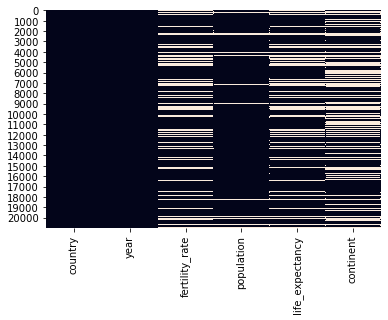

In [53]:
sns.heatmap(df.isnull(), cbar = False)

## Plotting

### Sanity check

<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

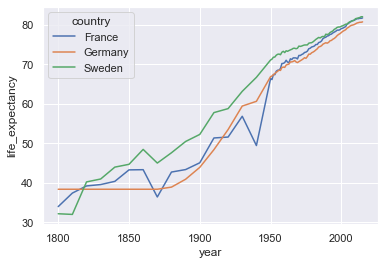

In [54]:
sns.set()
df_subset = df.loc[df['country'].isin(['France', 'Germany', 'Sweden'])]
sns.lineplot(x='year', y='life_expectancy', hue='country',
             data=df_subset)

<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

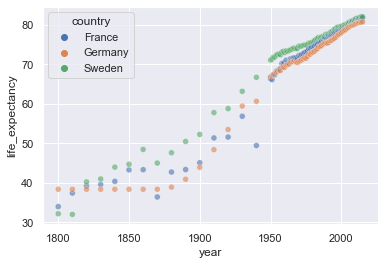

In [55]:
sns.scatterplot(x='year', y='life_expectancy', hue='country',
                data=df_subset, alpha=0.6)

### Scatter plot